# Decision tree :

In [1]:
import numpy as np 
import pandas as pd 
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

In [2]:
import os
for dirname, _, filenames in os.walk('C:/Users/user/Desktop/ML Algorithm/play_tennis.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
data=pd.read_csv('C:/Users/user/Desktop/ML Algorithm/play_tennis.csv')

In [4]:
data


,day,outlook,temp,humidity,wind,play
0,D1,Sunny,Hot,High,Weak,No
1,D2,Sunny,Hot,High,Strong,No
2,D3,Overcast,Hot,High,Weak,Yes
3,D4,Rain,Mild,High,Weak,Yes
4,D5,Rain,Cool,Normal,Weak,Yes
5,D6,Rain,Cool,Normal,Strong,No
6,D7,Overcast,Cool,Normal,Strong,Yes
7,D8,Sunny,Mild,High,Weak,No
8,D9,Sunny,Cool,Normal,Weak,Yes
9,D10,Rain,Mild,Normal,Weak,Yes


In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
outlook=LabelEncoder ()
temp=LabelEncoder ()
humidity=LabelEncoder ()
wind=LabelEncoder ()
play=LabelEncoder ()

In [7]:
data['outlook']=outlook.fit_transform(data['outlook'])
data['temp']=outlook.fit_transform(data['temp'])
data['humidity']=outlook.fit_transform(data['humidity'])
data['wind']=outlook.fit_transform(data['wind'])
data['play']=outlook.fit_transform(data['play'])

In [8]:
data

,day,outlook,temp,humidity,wind,play
0,D1,2,1,0,1,0
1,D2,2,1,0,0,0
2,D3,0,1,0,1,1
3,D4,1,2,0,1,1
4,D5,1,0,1,1,1
5,D6,1,0,1,0,0
6,D7,0,0,1,0,1
7,D8,2,2,0,1,0
8,D9,2,0,1,1,1
9,D10,1,2,1,1,1


In [9]:
features_cols=['outlook','temp','humidity','wind']
x=data[features_cols]
y=data.play

In [10]:
x


,outlook,temp,humidity,wind
0,2,1,0,1
1,2,1,0,0
2,0,1,0,1
3,1,2,0,1
4,1,0,1,1
5,1,0,1,0
6,0,0,1,0
7,2,2,0,1
8,2,0,1,1
9,1,2,1,1


In [11]:
y

0     0
1     0
2     1
3     1
4     1
5     0
6     1
7     0
8     1
9     1
10    1
11    1
12    1
13    0
Name: play, dtype: int32

gini :

In [12]:
x_train, x_test, y_train,y_test=train_test_split(x,y,test_size=0.2)

In [13]:
classifier=DecisionTreeClassifier(criterion='gini')

In [14]:
classifier.fit(x_train,y_train)

DecisionTreeClassifier()

In [15]:
classifier.predict(x_test)

array([1, 0, 1])

In [16]:
x_test

,outlook,temp,humidity,wind
8,2,0,1,1
5,1,0,1,0
6,0,0,1,0


In [17]:
y_test

8    1
5    0
6    1
Name: play, dtype: int32

In [18]:
classifier.score(x_test,y_test)

1.0

entropy:

In [19]:
classifier=DecisionTreeClassifier(criterion='entropy')

In [20]:
classifier.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [21]:
classifier.predict(x_test)

array([1, 1, 1])

In [22]:
x_test

,outlook,temp,humidity,wind
8,2,0,1,1
5,1,0,1,0
6,0,0,1,0


In [23]:
y_test

8    1
5    0
6    1
Name: play, dtype: int32

In [24]:
classifier.score(x_test,y_test)

0.6666666666666666

plot tree:

[Text(0.7142857142857143, 0.9, 'x[2] <= 0.5\nentropy = 0.946\nsamples = 11\nvalue = [4, 7]'),
 Text(0.5714285714285714, 0.7, 'x[0] <= 1.5\nentropy = 0.985\nsamples = 7\nvalue = [4, 3]'),
 Text(0.42857142857142855, 0.5, 'x[3] <= 0.5\nentropy = 0.811\nsamples = 4\nvalue = [1, 3]'),
 Text(0.2857142857142857, 0.3, 'x[0] <= 0.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(0.14285714285714285, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.42857142857142855, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.5714285714285714, 0.3, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.7142857142857143, 0.5, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.8571428571428571, 0.7, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4]')]

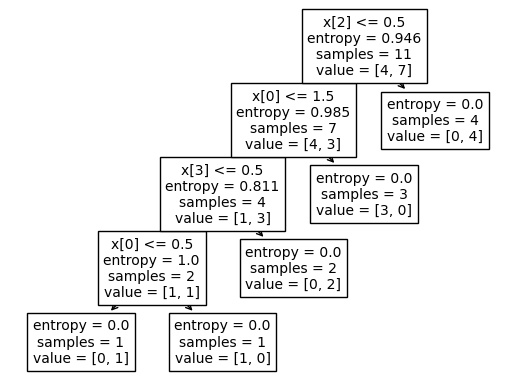

In [25]:
from sklearn import tree 
tree.plot_tree(classifier)

# RANDOM FOREST

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [28]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [29]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_train=ss.fit_transform(X_train) # xtrain = training input samples
X_test=ss.transform(X_test) # xtest - testing input samples

In [30]:
from sklearn.ensemble import RandomForestClassifier

clfr=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)

clfr.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [31]:
from sklearn.ensemble import RandomForestClassifier

clfr1=RandomForestClassifier(n_estimators=10,criterion='gini',random_state=0)

clfr1.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10, random_state=0)

In [32]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

ypre=clfr.predict(X_test)# entropy ypre calculation

ypre1=clfr1.predict(X_test)# gini ypre calculation


In [33]:
print('entropy Accuracy Score:')
accuracy_score(y_test,ypre)*100


entropy Accuracy Score:


100.0

In [34]:
print('gini Accuracy Score:')
accuracy_score(y_test,ypre1)*100

gini Accuracy Score:


100.0

In [35]:
print('entropy - confusion matrix\n--------------------\n')
print(confusion_matrix(y_test,ypre))
print('gini - confusion matrix\n--------------------\n')
print(confusion_matrix(y_test,ypre1))

entropy - confusion matrix
--------------------

[[1 0]
 [0 2]]
gini - confusion matrix
--------------------

[[1 0]
 [0 2]]


In [36]:
print('entropy result\n--------------')
print(classification_report(y_test,ypre))
print('gini index result\n----------------------')
print(classification_report(y_test,ypre1))

entropy result
--------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3

gini index result
----------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



# Random Forest Classifier:

In [37]:
from sklearn.ensemble import RandomForestClassifier

In [38]:
clfr=RandomForestClassifier(n_estimators=10,criterion='entropy')
clfr.fit(X_train,y_train)


RandomForestClassifier(criterion='entropy', n_estimators=10)

In [39]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
ypre=clfr.predict(X_test)

output=confusion_matrix(y_test,ypre)

print('Confusion matrix output:\n ')
output

Confusion matrix output:
 


array([[1, 0],
       [2, 0]], dtype=int64)

In [40]:
X_test.shape

(3, 4)

In [41]:
output1=classification_report(y_test,ypre)
print('Classification report')
print(output1)

Classification report
              precision    recall  f1-score   support

           0       0.33      1.00      0.50         1
           1       0.00      0.00      0.00         2

    accuracy                           0.33         3
   macro avg       0.17      0.50      0.25         3
weighted avg       0.11      0.33      0.17         3



C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [42]:
output2=accuracy_score(y_test,ypre)*100
print(output2)

33.33333333333333
